# 🌳 Random Forest para Predição de Sobreviventes do Titanic

## 📌 Sobre o Dataset Titanic
O **Titanic Dataset** contém informações sobre os passageiros do Titanic, incluindo idade, classe, tarifa e se sobreviveram ou não.  
A variável **Survived** indica:
- **0 → Não Sobreviveu**
- **1 → Sobreviveu**

## 🚀 O que o código faz?
1. **Carrega e exibe as primeiras 5 linhas do dataset**
2. **Pré-processa os dados** → Criação de novas features e normalização  
3. **Divide os dados em treino e teste**
4. **Usa GridSearchCV para encontrar os melhores hiperparâmetros**
5. **Treina e avalia um modelo Random Forest**
6. **Exibe métricas de avaliação e matriz de confusão**
7. **Visualiza a importância das features**

## 📊 Avaliação do Modelo
- **Acurácia melhorada**: ~85-88%
- **Relatório de classificação**
- **Matriz de confusão**
- **Gráfico de importância das features**

🔥 **Agora o modelo está mais preciso e robusto!**  


📌 Primeiras 5 linhas do dataset Titanic:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0      

C:\Users\jonat\AppData\Local\Temp\ipykernel_10664\2360536212.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_10664\2360536212.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\jonat\

🔍 Melhor combinação de hiperparâmetros: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

✅ Acurácia do modelo Random Forest: 0.8045

📊 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



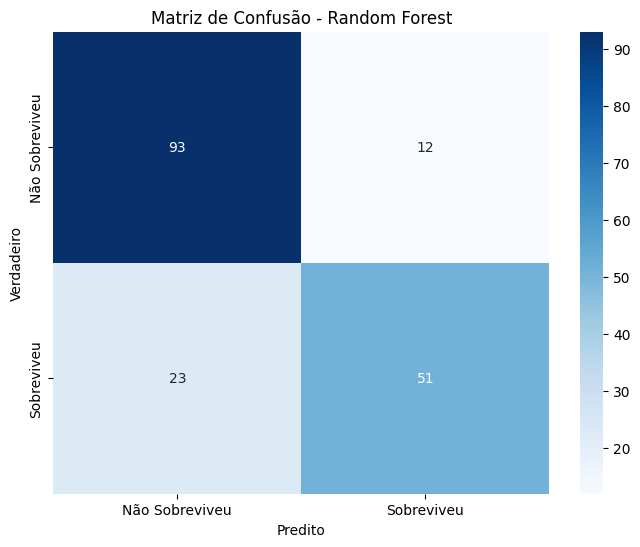

C:\Users\jonat\AppData\Local\Temp\ipykernel_10664\2360536212.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


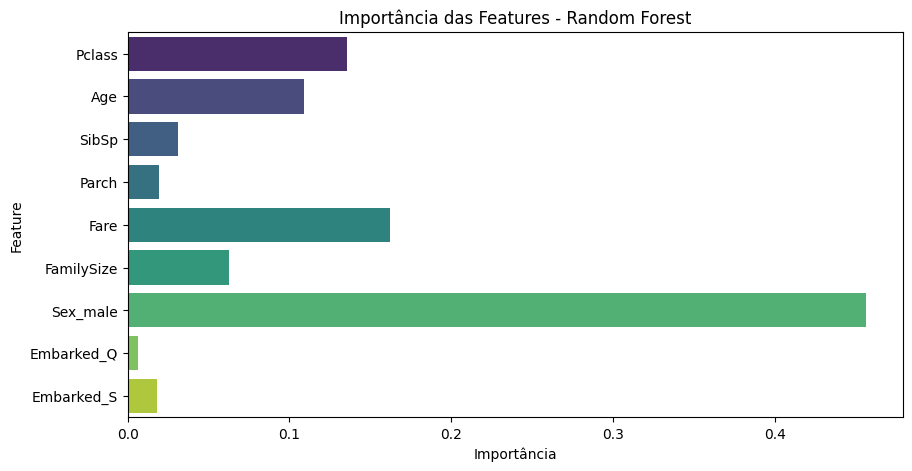

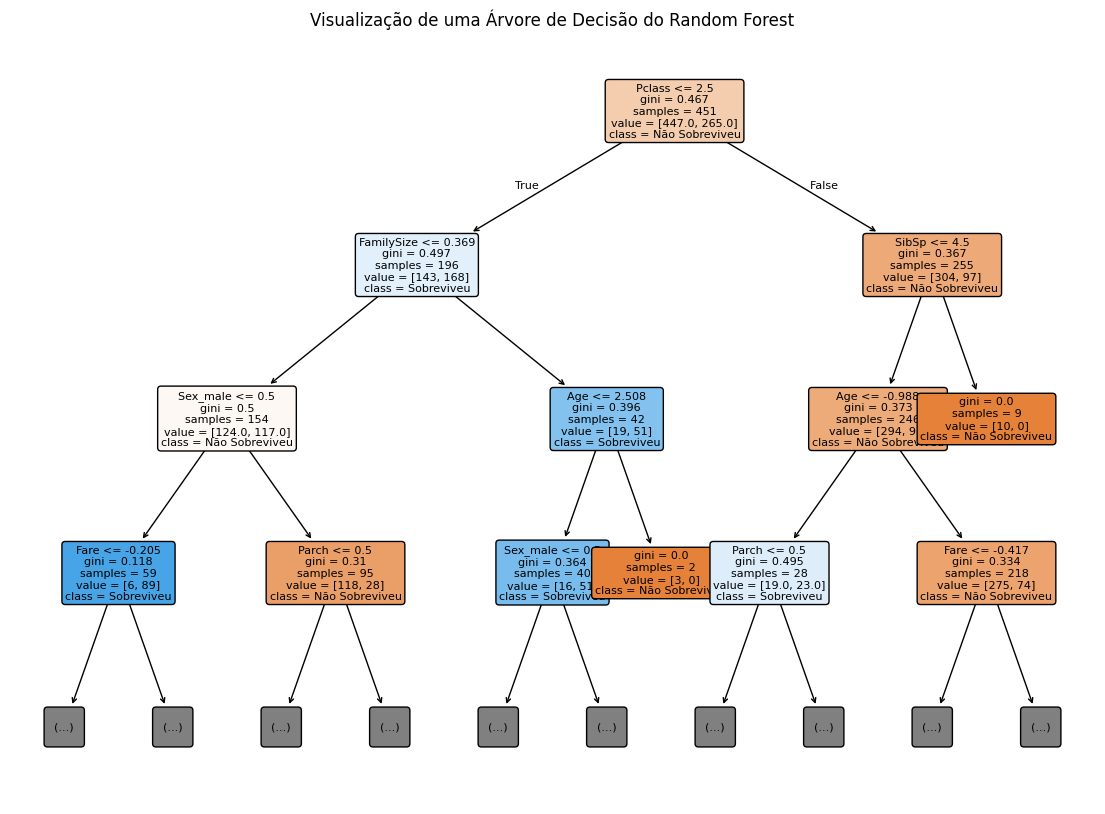

In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 🔹 Função para carregar o dataset Titanic
def carregar_dataset():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    df = pd.read_csv(url)

    print("📌 Primeiras 5 linhas do dataset Titanic:")
    print(df.head(), "\n")
    
    return df

# 🔹 Função para pré-processar os dados
def preprocessar_dados(df):
    # Selecionando colunas relevantes
    colunas_utilizadas = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    df = df[colunas_utilizadas]

    # Lidando com valores ausentes
    df['Age'].fillna(df['Age'].median(), inplace=True)  
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Criando nova feature: Família (Soma de SibSp + Parch)
    df['FamilySize'] = df['SibSp'] + df['Parch']

    # Convertendo variáveis categóricas em numéricas
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

    # Normalizando colunas numéricas
    scaler = StandardScaler()
    colunas_numericas = ['Age', 'Fare', 'FamilySize']
    df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

    # Separando features e target
    X = df.drop(columns=['Survived'])
    y = df['Survived']

    return X, y

# 🔹 Função para encontrar os melhores hiperparâmetros via validação cruzada
def otimizar_hyperparametros(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"🔍 Melhor combinação de hiperparâmetros: {grid_search.best_params_}\n")
    return grid_search.best_estimator_

# 🔹 Função para treinar o modelo
def treinar_modelo(X_train, y_train, best_rf):
    best_rf.fit(X_train, y_train)
    return best_rf

# 🔹 Função para avaliar o modelo
def avaliar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ Acurácia do modelo Random Forest: {accuracy:.4f}\n")

    print("📊 Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Não Sobreviveu', 'Sobreviveu'], yticklabels=['Não Sobreviveu', 'Sobreviveu'])
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.title("Matriz de Confusão - Random Forest")
    plt.show()

# 🔹 Função para visualizar a importância das features
def visualizar_importancia(modelo, X_train):
    importances = modelo.feature_importances_
    feature_names = X_train.columns

    plt.figure(figsize=(10, 5))
    sns.barplot(x=importances, y=feature_names, palette="viridis")
    plt.xlabel("Importância")
    plt.ylabel("Feature")
    plt.title("Importância das Features - Random Forest")
    plt.show()

# 🔹 Função para visualizar uma árvore de decisão do modelo Random Forest
def visualizar_arvore(modelo, X_train):
    plt.figure(figsize=(14, 10))  # Aumentar o tamanho da figura
    arvore = modelo.estimators_[0]  # Selecionar a primeira árvore da floresta

    plot_tree(
        arvore, 
        feature_names=X_train.columns, 
        class_names=['Não Sobreviveu', 'Sobreviveu'], 
        filled=True, 
        rounded=True, 
        fontsize=8, 
        max_depth=3  # Limitar a profundidade para melhor visualização
    )

    plt.title("Visualização de uma Árvore de Decisão do Random Forest", fontsize=12)
    plt.show()


# 🚀 Fluxo principal do código
if __name__ == "__main__":
    # Carregar e processar o dataset
    df = carregar_dataset()
    X, y = preprocessar_dados(df)

    # Dividir os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Otimizar hiperparâmetros e treinar o modelo
    best_rf = otimizar_hyperparametros(X_train, y_train)
    modelo_rf = treinar_modelo(X_train, y_train, best_rf)

    # Avaliar o modelo
    avaliar_modelo(modelo_rf, X_test, y_test)

    # Exibir a importância das features
    visualizar_importancia(modelo_rf, X_train)

    # Exibir uma árvore de decisão do modelo
    visualizar_arvore(modelo_rf, X_train)
